In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gseapy as gp

In [2]:
neutrophils = sc.read_h5ad("/mnt/c/Users/ouyangkang/Downloads/neutrophil_subtype.h5ad")

In [3]:
neutrophils.obs["category"] = ["Cancer" if "BC" in batch else "Normal" for batch in neutrophils.obs["batch"]]

In [4]:
neutrophils.obs.groupby("annotation")["category"].value_counts()

/tmp/ipykernel_566/3031839381.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  neutrophils.obs.groupby("annotation")["category"].value_counts()


annotation                category
Activated neutrophil      Normal      1623
                          Cancer        18
Educated neutrophil       Cancer       247
                          Normal       180
Immature neutrophil       Normal      2640
                          Cancer       150
Proligerative neutrophil  Normal        43
                          Cancer         2
Name: count, dtype: int64

In [5]:
neutrophils.obs["category"] = pd.Categorical(neutrophils.obs["category"], categories=["Cancer", "Normal"], ordered=True)
indices = neutrophils.obs.sort_values(["annotation", "category"]).index
neutrophils = neutrophils[indices, :]

In [6]:
neutrophils.to_df().T

,1618.0,187.0,170.0,80.0,321.0,1136.0,255.0,147.0,407.0,116.0,...,2206.0-1,1656.0-2,2071.0,1173.0-1,1288.0-2,1088.0-2,56.0-2,2415.0,125.0-2,2109.0-1
AC136352.4,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,...,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617
PHF1,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,...,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803
B3GALT4,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,...,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901
HCG27,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,...,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014
ZNRD1ASP,-0.036823,-0.036823,-0.036823,-0.036823,-0.036823,-0.036823,-0.036823,-0.036823,-0.036823,-0.036823,...,-0.036823,-0.036823,-0.036823,-0.036823,-0.036823,-0.036823,-0.036823,-0.036823,-0.036823,-0.036823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NUP50,-0.468258,-0.468258,-0.468258,-0.468258,-0.468258,-0.468258,-0.468258,-0.468258,-0.468258,-0.468258,...,-0.468258,-0.468258,-0.468258,-0.468258,-0.468258,-0.468258,-0.468258,-0.468258,-0.468258,-0.468258
NUP50-DT,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,...,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938
TTC3,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,...,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587
PACSIN2,-0.887795,-0.887795,-0.887795,-0.887795,-0.887795,-0.887795,-0.887795,-0.887795,-0.887795,-0.887795,...,1.283275,1.734088,-0.887795,-0.887795,-0.887795,-0.887795,-0.887795,-0.887795,-0.887795,-0.887795


In [7]:
neutrophils

View of AnnData object with n_obs × n_vars = 4903 × 19365
    obs: 'total_counts', 'pct_counts_mt', 'n_genes_by_counts', 'orig.ident', 'x', 'y', 'leiden', 'batch', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'annotation', 'category'
    var: 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-0', 'gene type-0', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable-1', 'gene type-1', 'means-2', 'dispersions-2', 'dispersions_norm-2', 'highly_variable-2', 'gene type-2', 'means-3', 'dispersions-3', 'dispersions_norm-3', 'highly_variable-3', 'gene type-3', 'means-4', 'dispersions-4', 'dispersions_norm-4', 'highly_variable-4', 'gene type-4', 'mt', 'ribo', 'hb

In [8]:
sc.tl.rank_genes_groups(neutrophils,
                        groupby='category',
                        use_raw=False,
                        layer='counts',
                        method='wilcoxon',
                        groups=["Cancer"],
                        reference='Normal')

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [9]:
neutrophils.X.max() # already log1p

10.0

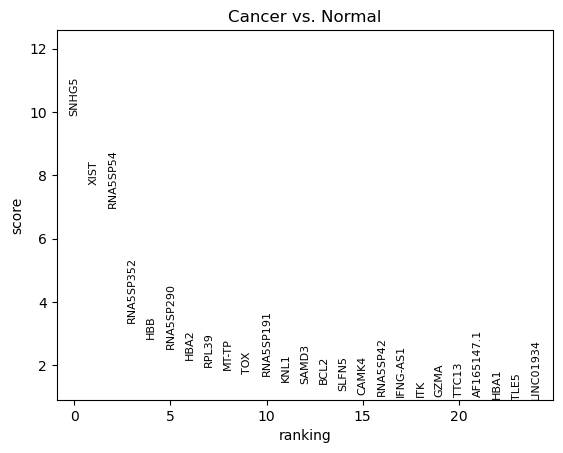

In [10]:
sc.pl.rank_genes_groups(neutrophils, n_genes=25, sharey=False)

In [11]:
# get deg result
result = neutrophils.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names','scores', 'pvals','pvals_adj','logfoldchanges']})

In [12]:
degs

,Cancer_names,Cancer_scores,Cancer_pvals,Cancer_pvals_adj,Cancer_logfoldchanges
0,SNHG5,9.894724,4.388213e-23,1.472751e-21,1.764169
1,XIST,7.692669,1.440968e-14,3.394690e-13,9.705738
2,RNA5SP54,6.962087,3.352686e-12,6.958710e-11,3.773634
3,RNA5SP352,3.354765,7.943248e-04,8.269946e-03,5.135801
4,HBB,2.852110,4.343010e-03,4.027892e-02,3.111549
...,...,...,...,...,...
19360,RN7SK,-31.685205,2.484166e-220,9.621177e-217,-16.163465
19361,MALAT1,-33.149208,5.813785e-241,2.814599e-237,-161.133545
19362,MT-RNR2,-33.225361,4.633428e-242,2.990878e-238,-268.429718
19363,MT-RNR1,-33.490578,6.610374e-246,6.400494e-242,-83.610786


In [13]:
# subset up or down regulated genes
degs_sig = degs[degs.Cancer_pvals_adj < 0.05]
degs_up = degs_sig[degs_sig.Cancer_logfoldchanges > 0]
degs_dw = degs_sig[degs_sig.Cancer_logfoldchanges < 0]

In [14]:
print(degs_dw.shape)
print(degs_up.shape)

(2120, 5)
(5, 5)


In [15]:
enr_up = gp.enrichr(degs_up.Cancer_names,
                    gene_sets='GO_Biological_Process_2021',
                    outdir=None)

In [16]:
# trim (go:...)
enr_up.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0]

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


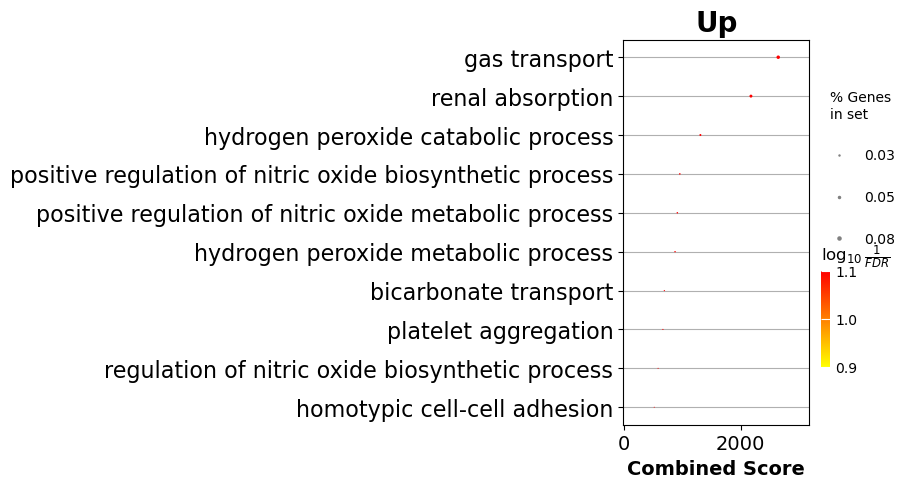

In [17]:
# dotplot
gp.dotplot(enr_up.res2d, figsize=(3,5), title="Up", cmap = plt.cm.autumn_r)
plt.show()

In [54]:
enr_dw = gp.enrichr(degs_dw.Cancer_names,
                    gene_sets='GO_Biological_Process_2021',
                    outdir=None)

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


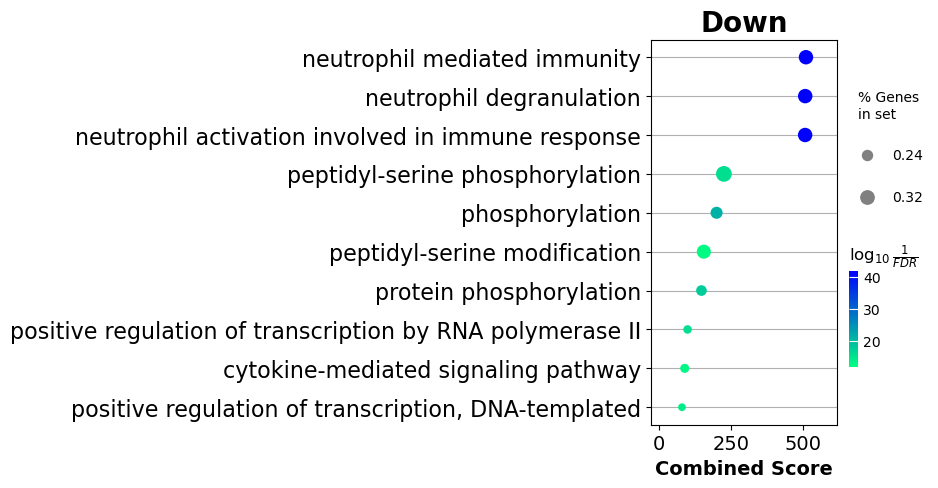

In [19]:
enr_dw.res2d.Term = enr_dw.res2d.Term.str.split(" \(GO").str[0]
gp.dotplot(enr_dw.res2d,
           figsize=(3,5),
           title="Down",
           cmap = plt.cm.winter_r,
           size=5)
plt.show()

In [20]:
# concat results
enr_up.res2d['UP_DW'] = "UP"
enr_dw.res2d['UP_DW'] = "DOWN"
enr_res = pd.concat([enr_up.res2d.head(), enr_dw.res2d.head()])

In [21]:
from gseapy.scipalette import SciPalette
sci = SciPalette()
NbDr = sci.create_colormap()

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


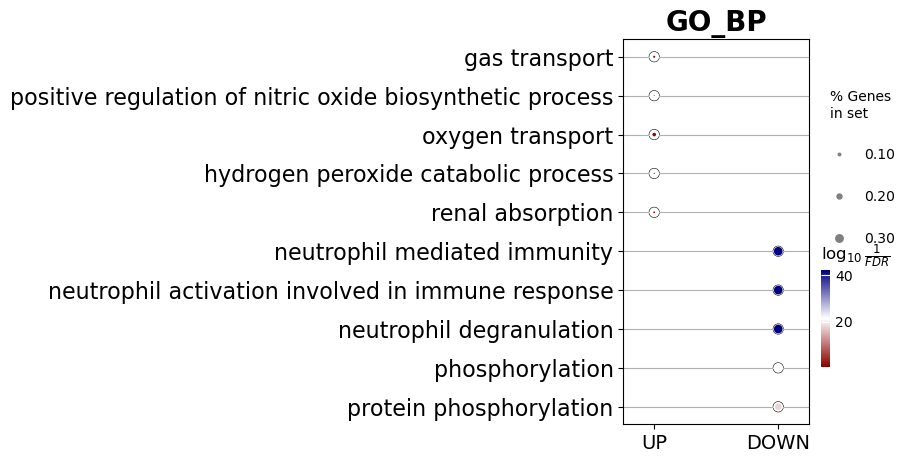

In [22]:
# display multi-datasets
ax = gp.dotplot(enr_res,figsize=(3,5),
                x='UP_DW',
                x_order = ["UP","DOWN"],
                title="GO_BP",
                cmap = NbDr.reversed(),
                size=3,
                show_ring=True)
ax.set_xlabel("")
plt.show()

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


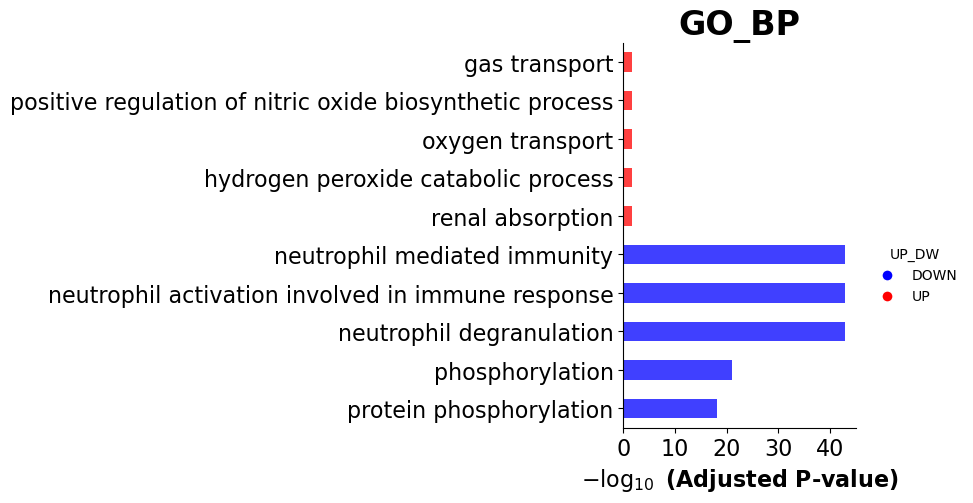

In [23]:
ax = gp.barplot(enr_res, figsize=(3,5),
                group ='UP_DW',
                title ="GO_BP",
                color = ['b','r'])

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


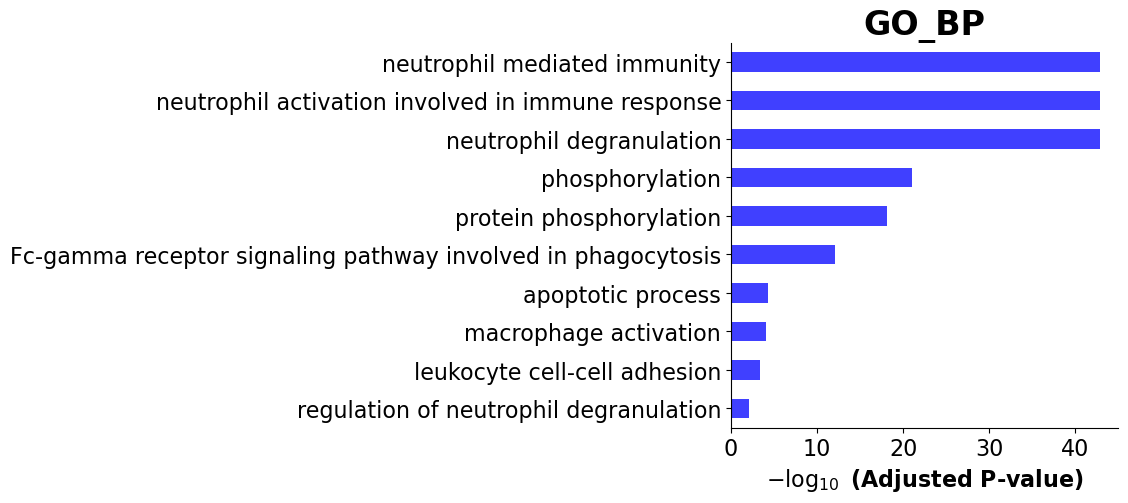

In [59]:
ax = gp.barplot(enr_dw.res2d, figsize=(5,5),
                # group ='DW',
                title ="GO_BP",
                color = "blue")

In [55]:
select_list = [enr_dw.res2d.Term[0], enr_dw.res2d.Term[1], enr_dw.res2d.Term[2], enr_dw.res2d.Term[3], enr_dw.res2d.Term[4], enr_dw.res2d.Term[11], enr_dw.res2d.Term[66], enr_dw.res2d.Term[79], enr_dw.res2d.Term[122], enr_dw.res2d.Term[319]]
enr_dw.res2d = enr_dw.res2d[enr_dw.res2d["Term"].isin(select_list)]

In [58]:
enr_dw.res2d.Term = enr_dw.res2d.Term.str.split(" \(GO").str[0]

In [56]:
enr_dw.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,neutrophil mediated immunity (GO:0002446),169/488,3.402546e-47,1.326469e-43,0,0,4.768568,510.222370,ATP8A1;GMFG;RAB3D;ABCA13;STK10;ANPEP;FTH1;LAMP...
1,GO_Biological_Process_2021,neutrophil activation involved in immune respo...,168/485,6.233562e-47,1.326469e-43,0,0,4.768359,507.313068,ATP8A1;GMFG;RAB3D;ABCA13;STK10;ANPEP;FTH1;LAMP...
2,GO_Biological_Process_2021,neutrophil degranulation (GO:0043312),167/481,8.283527e-47,1.326469e-43,0,0,4.783629,507.577588,ATP8A1;GMFG;RAB3D;ABCA13;STK10;ANPEP;FTH1;LAMP...
3,GO_Biological_Process_2021,phosphorylation (GO:0016310),116/400,7.462421e-25,8.962368e-22,0,0,3.586377,199.240243,DGKG;PANK2;CERK;GMFG;STK10;PPP4R1;TBK1;RPS6KA5...
4,GO_Biological_Process_2021,protein phosphorylation (GO:0006468),127/496,8.694053e-22,8.353246e-19,0,0,3.023995,146.646296,CCNH;GMFG;IGF1R;STK10;RPS6KA3;PPP4R1;TBK1;SLK;...
11,GO_Biological_Process_2021,Fc-gamma receptor signaling pathway involved i...,34/71,2.288441e-15,9.161392e-13,0,0,7.860149,264.972732,CYFIP2;WIPF1;WIPF2;WAS;PIK3CB;ACTB;ACTG1;CDC42...
66,GO_Biological_Process_2021,apoptotic process (GO:0006915),50/231,6.667639e-07,4.780797e-05,0,0,2.361945,33.588820,CYFIP2;CSRNP1;HIP1;ITGB2;JADE1;IFIT2;CASP8;CAS...
79,GO_Biological_Process_2021,macrophage activation (GO:0042116),15/36,1.451823e-06,8.718194e-05,0,0,6.060061,81.463528,ITGAM;CD93;SYK;IFNGR1;SLC11A1;C5AR1;ITGB2;DYSF...
122,GO_Biological_Process_2021,leukocyte cell-cell adhesion (GO:0007159),12/28,1.165744e-05,4.553037e-04,0,0,6.355787,72.198985,ROCK1;ITGA4;SEMA4D;SYK;TNIP1;ITGB2;PECAM1;MSN;...
319,GO_Biological_Process_2021,regulation of neutrophil degranulation (GO:004...,4/5,5.763230e-04,8.625095e-03,0,0,33.797732,252.091952,ITGAM;SPI1;SYK;ITGB2


In [42]:
enr_dw.res2d.to_csv("/mnt/c/Users/ouyangkang/down_bp.csv", index=None)

In [71]:
import time
t1 = time.time()
# NOTE: To speed up, use gp.prerank instead with your own ranked list.
res = gp.gsea(data=neutrophils.to_df().T, # row -> genes, column-> samples
        gene_sets="GO_Biological_Process_2023",
        cls=neutrophils.obs.category,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 16)
t2=time.time()
print(t2-t1)

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/gsea.py:110: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=cls_dict, axis=1).std(numeric_only=True, ddof=0)


339.13411140441895


In [70]:
res.res2d.head(10)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,Phosphorylation,-0.611462,-3.617508,0.0,0.0,0.0,168/370,23.10%,DMPK;HCK;LIMK2;FGR;LRRK2;CSF2RB;PIK3CD;NADK;ST...
1,gsea,Peptidyl-Serine Phosphorylation,-0.664248,-3.56307,0.0,0.0,0.0,55/139,12.61%,DMPK;LRRK2;SRPK2;TGFBR2;TOP1;MAPKAPK2;GRK2;STK...
2,gsea,Chromatin Remodeling,-0.619997,-3.553899,0.0,0.0,0.0,85/198,18.87%,KDM6B;KDM4B;BAZ1A;JARID2;SRPK2;SF3B1;BAZ2B;TOP...
3,gsea,Cellular Response To Cytokine Stimulus,-0.650868,-3.552664,0.0,0.0,0.0,75/210,12.68%,CSF3R;DUSP1;HCK;IRF1;LRRK2;HIF1A;MNDA;CSF2RB;G...
4,gsea,Protein Phosphorylation,-0.603107,-3.515868,0.0,0.0,0.0,148/411,16.55%,DMPK;HCK;LIMK2;FGR;LRRK2;CSF2RB;PIK3CD;STK10;L...
5,gsea,Peptidyl-Serine Modification,-0.651682,-3.503051,0.0,0.0,0.0,52/143,12.17%,DMPK;LRRK2;SRPK2;TGFBR2;TOP1;MAPKAPK2;GRK2;STK...
6,gsea,Response To Cytokine,-0.677903,-3.47989,0.0,0.0,0.0,45/108,11.01%,SELL;MCL1;SLC11A1;MEFV;IL6R;HCLS1;ADAR;MX2;STA...
7,gsea,Regulation Of Intracellular Signal Transduction,-0.610436,-3.409508,0.0,0.0,0.0,90/252,17.19%,TMSB4X;ARAP1;RASSF2;PREX1;LRRK2;ARHGAP9;LYN;MY...
8,gsea,Macroautophagy,-0.630616,-3.35911,0.0,0.0,0.0,57/94,26.53%,ATG16L2;GABARAP;MTMR3;TCIRG1;RUBCNL;TOM1;ULK1;...
9,gsea,Defense Response To Virus,-0.633447,-3.342029,0.0,0.0,0.0,71/142,20.49%,IRF1;NLRP1;GBP2;ZNFX1;IFIT2;LYST;TLR2;MX2;TRIM...


In [26]:
res.ranking.shape

(19365,)

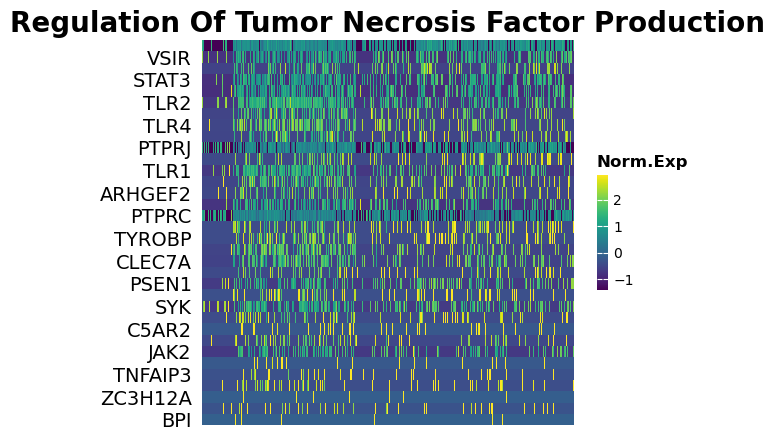

In [69]:
## Heatmap of gene expression
i = 34
genes = res.res2d.Lead_genes.iloc[i].split(";")
ax = gp.heatmap(df = res.heatmat.loc[genes],
           z_score=None,
           title=res.res2d.Term.iloc[i],
           figsize=(6,5),
           cmap=plt.cm.viridis,
           xticklabels=False)

In [75]:
# res.res2d.Term = res.res2d.Term.str.split(" \(GO").str[0]
term_list = [res.res2d.Term[0], res.res2d.Term[1], res.res2d.Term[20], res.res2d.Term[34], res.res2d.Term[102], res.res2d.Term[119], res.res2d.Term[133], res.res2d.Term[144], res.res2d.Term[177], res.res2d.Term[196], ]
term_list

['Phosphorylation (GO:0016310)',
 'Peptidyl-Serine Phosphorylation (GO:0018105)',
 'Endocytosis (GO:0006897)',
 'Regulation Of Tumor Necrosis Factor Production (GO:0032680)',
 'Regulation Of Cell Migration (GO:0030334)',
 'T Cell Receptor Signaling Pathway (GO:0050852)',
 'Regulation Of Cell Adhesion (GO:0030155)',
 'B Cell Differentiation (GO:0030183)',
 'Neutrophil Chemotaxis (GO:0030593)',
 'Neutrophil Migration (GO:1990266)']

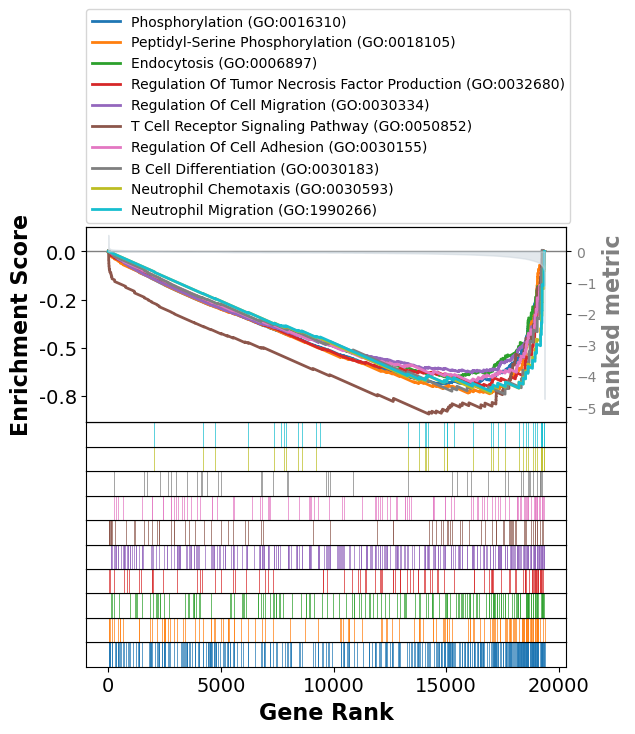

In [76]:
axs = res.plot(terms=term_list)

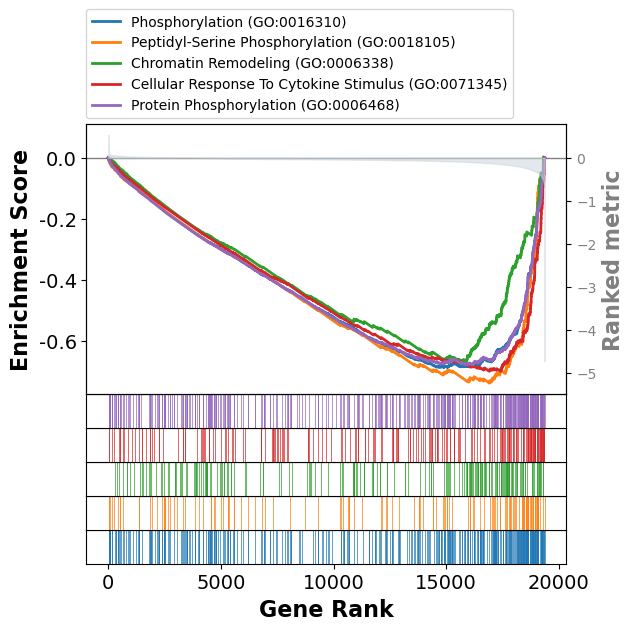

In [74]:
term = res.res2d.Term
# gp.gseaplot(res.ranking, term=term[i], **res.results[term[i]])
axs = res.plot(terms=term[:5])

In [29]:
import networkx as nx

In [31]:
# res.res2d.to_csv("/mnt/c/Users/ouyangkang/Desktop/comparison_analysis.csv", index=None)

In [81]:
nodes, edges = gp.enrichment_map(res.res2d)

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


In [33]:
nodes.Term = nodes.Term.str.split(" \(GO").str[0]

In [77]:
res.res2d[res.res2d["FDR q-val"] > 0.05]

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
1532,gsea,Positive Regulation Of Natural Killer Cell Med...,0.547058,1.721663,0.021429,0.210847,0.971,10/16,6.18%,RASGRP1;SLAMF6;SH2D1B;CD226;CRTAM;CD160;KLRC3;...
1684,gsea,Positive Regulation Of Natural Killer Cell Med...,0.51044,1.572412,0.044393,0.272951,0.999,9/15,6.18%,RASGRP1;SLAMF6;CD226;CRTAM;CD160;KLRC3;KLRC2;C...
1770,gsea,Mitochondrial Membrane Organization (GO:0007006),-0.410387,-1.474848,0.055369,0.050135,1.0,9/28,28.04%,MFN2;PPIF;MTX1;SPG7;PMAIP1;SLC25A5;GHITM;BAD;H...
1771,gsea,Monoatomic Anion Transport (GO:0006820),-0.430084,-1.474574,0.032887,0.050198,1.0,10/35,24.37%,BEST1;CLCN4;ANO10;CLCN6;SLC26A8;CLCN5;TTYH3;AN...
1772,gsea,Tight Junction Assembly (GO:0120192),-0.461801,-1.474337,0.042821,0.050247,1.0,3/27,5.06%,PECAM1;PAK2;APC
...,...,...,...,...,...,...,...,...,...,...
2098,gsea,tRNA Modification (GO:0006400),-0.139018,-0.545997,0.992537,0.985798,1.0,24/60,57.10%,OSGEP;TRMT12;DUS2;TRMT44;TRMT10A;DUS1L;TRMT1;T...
2099,gsea,Maturation Of 5.8S rRNA (GO:0000460),-0.177989,-0.502187,0.972932,0.994078,1.0,11/16,76.09%,PRKDC;LAS1L;EXOSC4;MTREX;NOL9;FTSJ3;NEDD4;EIF6...
2100,gsea,Mitochondrial Gene Expression (GO:0140053),-0.148019,-0.487677,0.998973,0.99548,1.0,42/94,56.80%,FOXO3;MRPS15;MRPS10;FASTKD5;MRPL44;MRPS30;TEFM...
2101,gsea,Maturation Of LSU-rRNA (GO:0000470),-0.153936,-0.464689,0.987635,0.997136,1.0,11/19,76.09%,RPL7;LAS1L;DDX18;NOP2;FTSJ3;NEDD4;RPL7L1;EIF6;...


In [82]:
edges

,src_idx,targ_idx,src_name,targ_name,jaccard_coef,overlap_coef,overlap_genes
0,1,3,Negative Regulation Of Tumor Necrosis Factor P...,Positive Regulation Of Protein Serine/Threonin...,0.023256,0.090909,TLR4
1,1,8,Negative Regulation Of Tumor Necrosis Factor P...,Phosphorylation (GO:0016310),0.005618,0.090909,RARA
2,2,4,Amyloid Fibril Formation (GO:1990000),"Regulation Of DNA Damage Response, Signal Tran...",0.047619,0.100000,MDM2
3,2,7,Amyloid Fibril Formation (GO:1990000),Regulation Of Necroptotic Process (GO:0060544),0.052632,0.100000,RIPK1
4,3,4,Positive Regulation Of Protein Serine/Threonin...,"Regulation Of DNA Damage Response, Signal Tran...",0.046512,0.166667,"SIRT1,PSMD10"
5,3,5,Positive Regulation Of Protein Serine/Threonin...,Phosphatidylinositol-Mediated Signaling (GO:00...,0.055556,0.125000,"CSF1R,PIK3CG,PIK3R5"
6,3,8,Positive Regulation Of Protein Serine/Threonin...,Phosphorylation (GO:0016310),0.020305,0.121212,"TGFB1,PIK3CG,LRRK2,AKT1"
7,4,8,"Regulation Of DNA Damage Response, Signal Tran...",Phosphorylation (GO:0016310),0.005587,0.083333,DYRK1A
8,5,7,Phosphatidylinositol-Mediated Signaling (GO:00...,Regulation Of Necroptotic Process (GO:0060544),0.030303,0.100000,OGT
9,5,8,Phosphatidylinositol-Mediated Signaling (GO:00...,Phosphorylation (GO:0016310),0.037838,0.291667,"PIK3CG,PIK3CA,STAT3,PIK3C3,PIK3CB,PI4KA,PIK3CD"


In [79]:
edges.to_csv("correlation.csv", index=None)

In [34]:
# build graph
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

# Add missing node if there is any
for node in nodes.index:
    if node not in G.nodes():
        G.add_node(node)

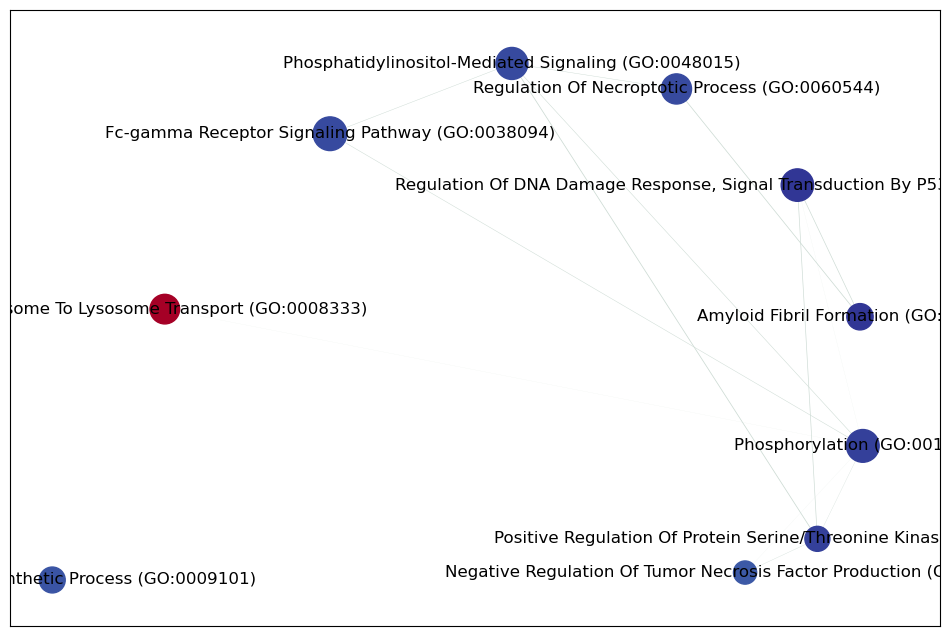

In [85]:
fig, ax = plt.subplots(figsize=(12, 8))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.NES),
                       node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')

plt.show()

In [ ]:
nodes.Term.to_dict()

{0: 'Glycoprotein Biosynthetic Process (GO:0009101)',
 1: 'Negative Regulation Of Tumor Necrosis Factor Production (GO:0032720)',
 2: 'Amyloid Fibril Formation (GO:1990000)',
 3: 'Positive Regulation Of Protein Serine/Threonine Kinase Activity (GO:0071902)',
 4: 'Regulation Of DNA Damage Response, Signal Transduction By P53 Class Mediator (GO:0043516)',
 5: 'Phosphatidylinositol-Mediated Signaling (GO:0048015)',
 6: 'Endosome To Lysosome Transport (GO:0008333)',
 7: 'Regulation Of Necroptotic Process (GO:0060544)',
 8: 'Phosphorylation (GO:0016310)',
 9: 'Fc-gamma Receptor Signaling Pathway (GO:0038094)'}